In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Data_Mining_project/heart_disease_data.csv")
#data = pd.read_csv("/content/drive/My Drive/heart_disease_data.csv")
data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
#dropping the id attribute
data = data.drop('id', axis=1)

In [4]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.shape

(5110, 11)

In [6]:
class_1 = data['stroke'].value_counts()[1]
class_0 = data['stroke'].value_counts()[0]
print("Class 1", class_1)
print("Class 0", class_0)

Class 1 249
Class 0 4861


In [7]:
#converting categorical attributes into numerical values
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1})
data['work_type'] = data['work_type'].map({ 'children': 0, 'Govt_jov': 1, 'Never_worked': 2, 'Private': 3,'Self-employed': 4})
data['Residence_type'] = data['Residence_type'].map({'Urban': 0, 'Rural': 1})
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3})
data.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3.0,0,228.69,36.6,2,1
1,1,61.0,0,0,1,4.0,1,202.21,NaN,0,1
2,0,80.0,0,1,1,3.0,1,105.92,32.5,0,1
3,1,49.0,0,0,1,3.0,0,171.23,34.4,3,1
4,1,79.0,1,0,1,4.0,1,174.12,24.0,0,1
5,0,81.0,0,0,1,3.0,0,186.21,29.0,2,1
6,0,74.0,1,1,1,3.0,1,70.09,27.4,0,1
7,1,69.0,0,0,0,3.0,0,94.39,22.8,0,1
8,1,59.0,0,0,1,3.0,1,76.15,NaN,1,1
9,1,78.0,0,0,1,3.0,0,58.57,24.2,1,1


In [8]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,657
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [9]:
data = data.dropna()
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3.0,0,228.69,36.6,2,1
2,0,80.0,0,1,1,3.0,1,105.92,32.5,0,1
3,1,49.0,0,0,1,3.0,0,171.23,34.4,3,1
4,1,79.0,1,0,1,4.0,1,174.12,24.0,0,1
5,0,81.0,0,0,1,3.0,0,186.21,29.0,2,1
6,0,74.0,1,1,1,3.0,1,70.09,27.4,0,1
7,1,69.0,0,0,0,3.0,0,94.39,22.8,0,1
9,1,78.0,0,0,1,3.0,0,58.57,24.2,1,1
10,1,81.0,1,0,1,3.0,1,80.43,29.7,0,1
12,1,54.0,0,0,1,3.0,0,104.51,27.3,3,1


In [10]:
data.duplicated().sum()

np.int64(0)

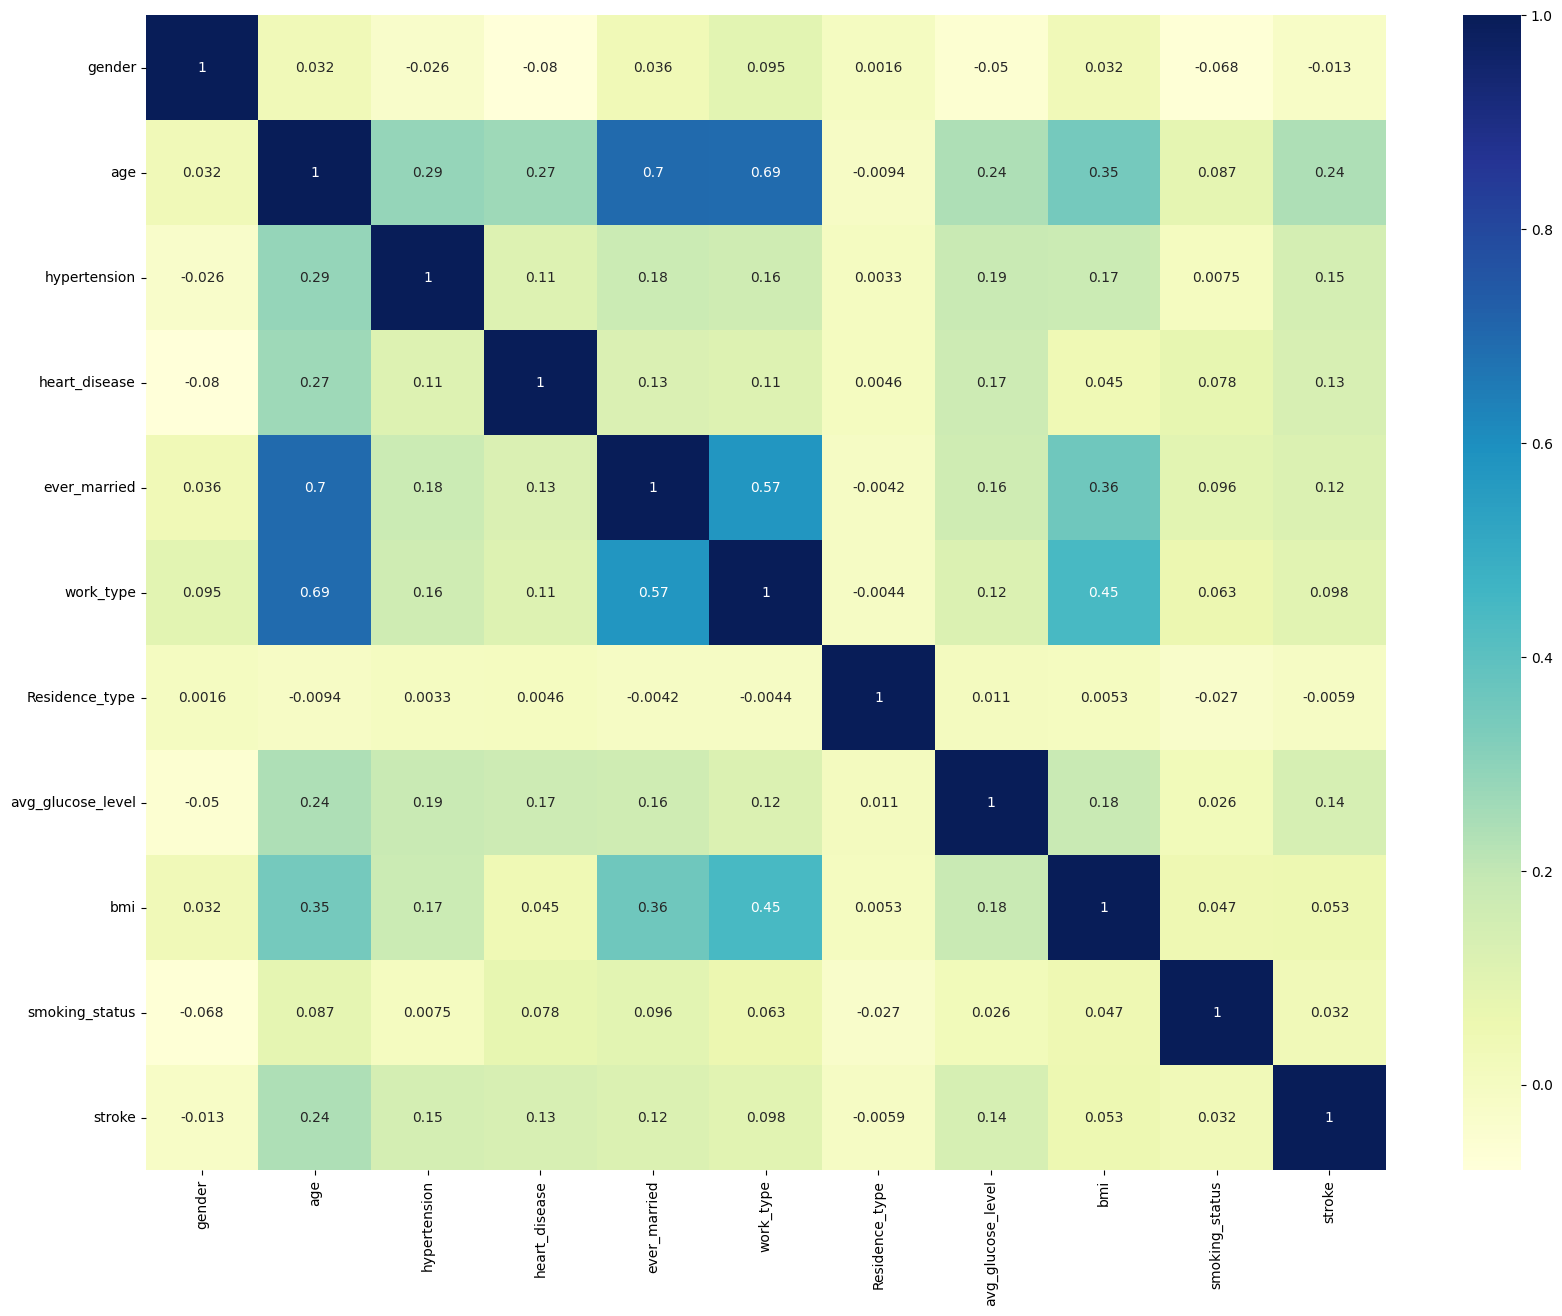

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

#BALANCING CLASSES

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
features=data.columns
features=features[:len(features)-1]
x=data[features].values
y=data['stroke'].values
x,y=sm.fit_resample(x,y)

In [13]:
class_0 = np.count_nonzero(y == 0)
class_1 = np.count_nonzero(y == 1)
print("Class 1", class_1)
print("Class 0", class_0)

Class 1 4098
Class 0 4098


#NORMALIZATION

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xscaled=sc.fit_transform(x)

#DECISION TREE CLASSIFIER

AVERAGE ACCURRACY OF MODEL IS :  0.9532699891367431

AVERAGE PRECISION OF MODEL IS :  0.9471836732968726

AVERAGE RECALL OF MODEL IS :  0.9602218648560112

AVERAGE F1 SCORE OF MODEL IS :  0.9536043876071101

SUM TOTAL OF CONFUSION MATRICES : 


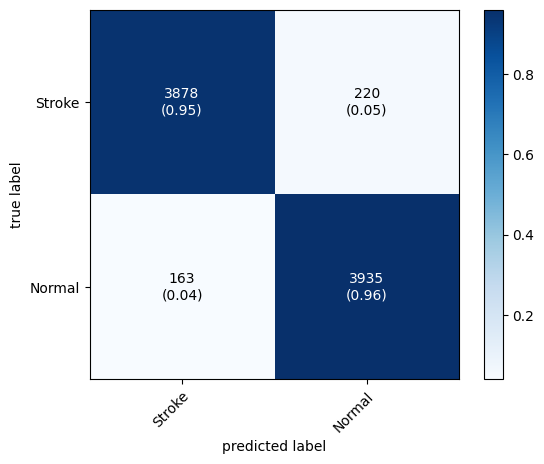

In [15]:
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
def decision_tree_classifier():
    #For stratified K-fold cross-validation:
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc=[]
    precision=[]
    recall=[]
    f1=[]
    confusion_matrices = []
    for train_index, test_index in skf.split(Xscaled,y):

         X_train=Xscaled[train_index]
         X_test=Xscaled[test_index]
         Y_train=y[train_index]
         Y_test=y[test_index]

         dtree=DecisionTreeClassifier(criterion='entropy')
         dtree=dtree.fit(X_train, Y_train)
         #tree.plot_tree(dtree,feature_names=features)
         Y_testPred = dtree.predict(X_test)

         matrix=confusion_matrix(Y_test,Y_testPred)
         confusion_matrices.append(matrix)
         testAccuracy = accuracy_score(Y_test, Y_testPred)
         acc.append(testAccuracy)
         testPrecision = precision_score(Y_test, Y_testPred)
         precision.append(testPrecision)
         testRecall = recall_score(Y_test, Y_testPred)
         recall.append(testRecall)
         testF1 = f1_score(Y_test, Y_testPred)
         f1.append(testF1)
    avg=sum(acc)/len(acc)
    print("AVERAGE ACCURRACY OF MODEL IS : ",avg)
    print()
    print("AVERAGE PRECISION OF MODEL IS : ",sum(precision)/len(precision))
    print()
    print("AVERAGE RECALL OF MODEL IS : ",sum(recall)/len(recall))
    print()
    print("AVERAGE F1 SCORE OF MODEL IS : ",sum(f1)/len(f1))
    print()
    print("SUM TOTAL OF CONFUSION MATRICES : ")
    confusion_matrices_array = np.array(confusion_matrices)
    summed_confusion_matrix = np.sum(confusion_matrices_array, axis=0)
    plot_confusion_matrix(summed_confusion_matrix,class_names=['Stroke','Normal'],show_normed=True,colorbar=True,show_absolute=True)
    plt.show()
decision_tree_classifier()

#LOGISTIC REGRESSION CLASSIFIER

AVERAGE ACCURRACY OF MODEL IS :  0.7897752198693432

AVERAGE PRECISION OF MODEL IS :  0.7702701951313818

AVERAGE RECALL OF MODEL IS :  0.8262556955239881

AVERAGE F1 SCORE OF MODEL IS :  0.7971503006813279

SUM TOTAL OF CONFUSION MATRICES : 


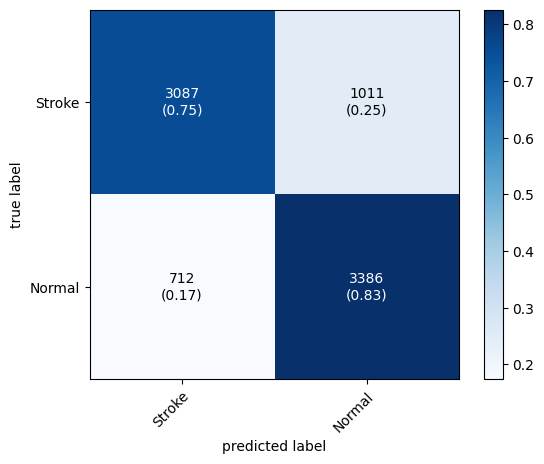

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
def logistic_regression():
    #For stratified K-fold cross-validation:
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc=[]
    precision=[]
    recall=[]
    f1=[]
    confusion_matrices = []
    for train_index, test_index in skf.split(Xscaled,y):

         X_train=Xscaled[train_index]
         X_test=Xscaled[test_index]
         Y_train=y[train_index]
         Y_test=y[test_index]

         LRModel = LogisticRegression(max_iter=3000)
         LRModel.fit(X_train, Y_train)
         Y_testPred = LRModel.predict(X_test)

         matrix=confusion_matrix(Y_test,Y_testPred)
         confusion_matrices.append(matrix)
         testAccuracy = accuracy_score(Y_test, Y_testPred)
         acc.append(testAccuracy)
         testPrecision = precision_score(Y_test, Y_testPred)
         precision.append(testPrecision)
         testRecall = recall_score(Y_test, Y_testPred)
         recall.append(testRecall)
         testF1 = f1_score(Y_test, Y_testPred)
         f1.append(testF1)
    avg=sum(acc)/len(acc)
    print("AVERAGE ACCURRACY OF MODEL IS : ",avg)
    print()
    print("AVERAGE PRECISION OF MODEL IS : ",sum(precision)/len(precision))
    print()
    print("AVERAGE RECALL OF MODEL IS : ",sum(recall)/len(recall))
    print()
    print("AVERAGE F1 SCORE OF MODEL IS : ",sum(f1)/len(f1))
    print()
    print("SUM TOTAL OF CONFUSION MATRICES : ")
    confusion_matrices_array = np.array(confusion_matrices)
    summed_confusion_matrix = np.sum(confusion_matrices_array, axis=0)
    plot_confusion_matrix(summed_confusion_matrix,class_names=['Stroke','Normal'],show_normed=True,colorbar=True,show_absolute=True)
    plt.show()
logistic_regression()

#K NEAREST NEIGHBOR CLASSIFIER

AVERAGE ACCURACY OF MODEL IS: 0.9228898495513327
AVERAGE PRECISION OF MODEL IS: 0.9305181232875007
AVERAGE RECALL OF MODEL IS: 0.9228894547187231
AVERAGE F1 SCORE OF MODEL IS: 0.9225411340969071


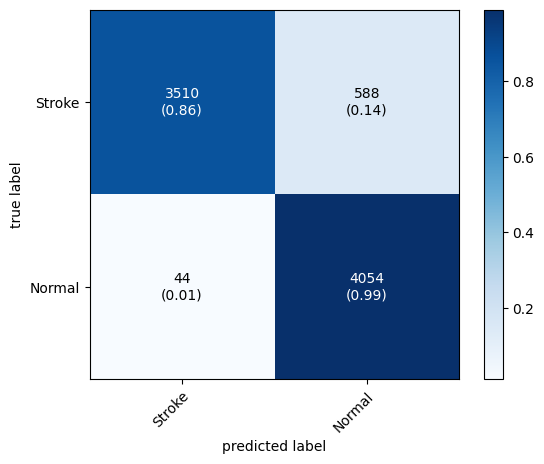

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def K_NeighborsClassifier():
    # Stratified K-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc = []
    precision = []
    recall = []
    f1 = []
    confusion_matrices = []

    for train_index, test_index in skf.split(Xscaled, y):
        X_train = Xscaled[train_index]
        X_test = Xscaled[test_index]
        Y_train = y[train_index]
        Y_test = y[test_index]

        # Initializing KNN classifier with k=7
        knn = KNeighborsClassifier(n_neighbors=7)

        # Training the classifier
        knn.fit(X_train, Y_train)

        # Making predictions
        Y_testPred = knn.predict(X_test)

        # Confusion matrix
        matrix = confusion_matrix(Y_test, Y_testPred)
        confusion_matrices.append(matrix)

        # Accuracy
        testAccuracy = accuracy_score(Y_test, Y_testPred)
        acc.append(testAccuracy)

        # Precision, Recall, F1 (macro average for multi-class)
        testPrecision = precision_score(Y_test, Y_testPred, average='macro')
        precision.append(testPrecision)

        testRecall = recall_score(Y_test, Y_testPred, average='macro')
        recall.append(testRecall)

        testF1 = f1_score(Y_test, Y_testPred, average='macro')
        f1.append(testF1)

    # Average metrics
    avg_accuracy = sum(acc) / len(acc)
    avg_precision = sum(precision) / len(precision)
    avg_recall = sum(recall) / len(recall)
    avg_f1 = sum(f1) / len(f1)

    print(f"AVERAGE ACCURACY OF MODEL IS: {avg_accuracy}")
    print(f"AVERAGE PRECISION OF MODEL IS: {avg_precision}")
    print(f"AVERAGE RECALL OF MODEL IS: {avg_recall}")
    print(f"AVERAGE F1 SCORE OF MODEL IS: {avg_f1}")
    confusion_matrices_array = np.array(confusion_matrices)
    summed_confusion_matrix = np.sum(confusion_matrices_array, axis=0)
    plot_confusion_matrix(summed_confusion_matrix,class_names=['Stroke','Normal'],show_normed=True,colorbar=True,show_absolute=True)
    plt.show()
K_NeighborsClassifier()

# ANN(Artificial Neural Network)

Accuracy: 0.9585365853658536
Precision: 0.9345579793340988
Recall: 0.9866666666666667
F1 Score: 0.9599056603773585


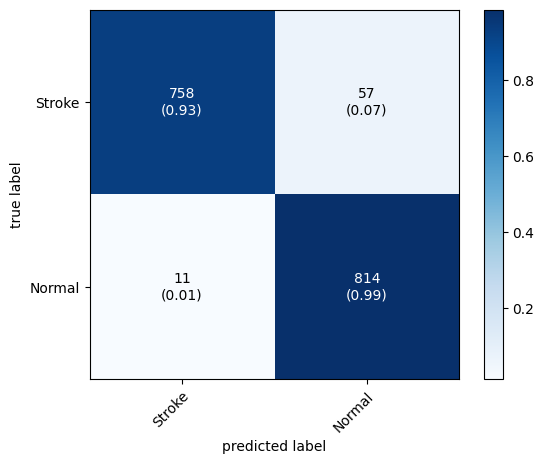

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       815
           1       0.93      0.99      0.96       825

    accuracy                           0.96      1640
   macro avg       0.96      0.96      0.96      1640
weighted avg       0.96      0.96      0.96      1640



In [18]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming your data preprocessing steps are as in the original code
# ... (Your data loading and preprocessing code from the original file) ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=42)

# Initialize the ANN model
ann = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the ANN model
ann.fit(X_train, y_train)

# Make predictions
y_pred = ann.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Stroke','Normal'], show_normed=True, colorbar=True, show_absolute=True)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


# Prediction using user input

In [ ]:
"Predicts the output for a given input using multiple models."
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def predict_with_models(input_data):

    # Initialize models
    models = {
        "Decision Tree": DecisionTreeClassifier(criterion='entropy'),
        "Logistic Regression": LogisticRegression(max_iter=3000),
        "KNN": KNeighborsClassifier(n_neighbors=7),
        "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    }

    # Scale the input data using the same scaler as before
    input_scaled = sc.transform(np.array(input_data).reshape(1, -1))

    results = {}
    for model_name, model in models.items():
        # Train the model using X_train and y_train (the entire dataset for simplicity)
        model.fit(Xscaled, y)
        prediction = model.predict(input_scaled)
        results[model_name] = prediction[0]

    # Find the best model based on accuracy across all data
    best_model = max(results, key=lambda k: results[k])  # Simple comparison of predictions

    return results, best_model

# Example usage:
input_values = [float(x) for x in input("Enter comma-separated input values with desired format: ").split(',')]
results, best_model = predict_with_models(input_values)

# Print results
print("Prediction Results:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

print("\nBest Model:", best_model)
